# Credit Card Fraud

In [26]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import random

In [8]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,64022.0,-3.042733,-0.095973,1.654987,-3.196483,-0.253013,0.621261,2.360466,-1.529582,3.036032,...,-0.398805,0.923072,-0.351916,-0.248545,0.319969,-0.329902,-2.284933,-0.952947,193.50,0
1,68396.0,1.168415,-0.266023,1.007399,0.770831,-0.894529,-0.021520,-0.614770,0.108002,0.991554,...,-0.111658,-0.189854,-0.050081,-0.082883,0.304962,0.345927,0.010382,0.026046,33.67,0
2,105479.0,-0.394283,1.119093,-0.520858,-0.910873,1.980528,-1.177091,1.887469,-0.622840,0.258496,...,0.225408,0.966848,-0.565173,0.672554,0.898117,0.385881,-0.016541,0.098275,21.19,0
3,62501.0,1.245674,0.166975,0.488306,0.635322,-0.562777,-1.011073,0.014953,-0.160211,0.170362,...,-0.262581,-0.816264,0.140304,0.357827,0.186423,0.096544,-0.035866,0.018495,8.99,0
4,155793.0,2.235363,-1.377807,-0.206124,-1.454186,-1.690667,-0.751144,-1.320413,-0.217918,-1.117415,...,-0.333843,-0.425307,0.420460,0.021505,-0.558638,-0.451314,0.049913,-0.028614,25.90,0


In [11]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds.")

492 frauds,  284315 nonfrauds.


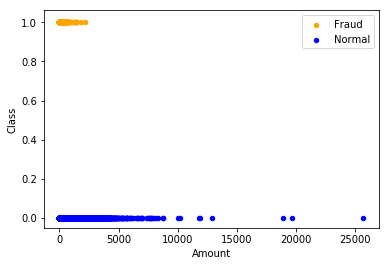

In [13]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [14]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [38]:
X = df.iloc[:,:-1]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)


[284807]
[284807]


In [39]:
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)
print("Accuracy: ", logistic.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[185124]
[99683]
[99683]
Accuracy:  0.998735993098121


[99683]
[99683]


Text(0.5, 42.0, 'Predicted label')

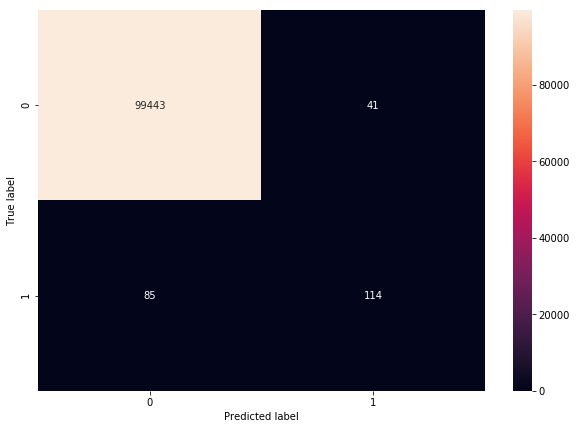

In [40]:
import seaborn as sns
y_predicted = logistic.predict(X_test)
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_predicted)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
